In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Default.xlsx')

C:\Users\wasim\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
data=data.drop(['Unnamed: 0'],axis=1)

In [5]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [6]:
data.corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


In [7]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

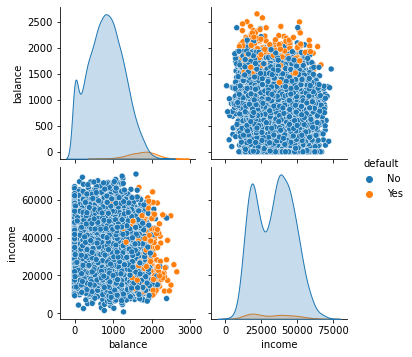

In [8]:
a=sns.pairplot(data ,hue = 'default')

### Logestic Regression of Balance vs Default

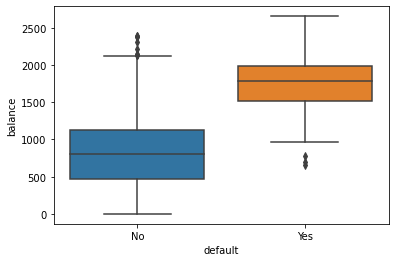

In [9]:
b=sns.boxplot(x='default' ,y='balance' , data=data)

In [11]:
X=data.iloc[:, 2].values.reshape(-1,1)
Y=data.iloc[:,1].values.reshape(-1,1)


### Encoding the feature

In [12]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [13]:
Y=le.fit_transform(Y)
Y

C:\Users\wasim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 1, 0, ..., 0, 0, 1])

### splitting the data in Train data and Split Data

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.2)

In [16]:
x_train.shape

(8000, 1)

In [17]:
x_test.shape

(2000, 1)

### Fitting data in LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LR_1=LogisticRegression()

In [20]:
LR_1.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=LR_1.predict(x_test)

### confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1382,   20],
       [ 566,   32]], dtype=int64)

### Logestic Regression of Income vs Default

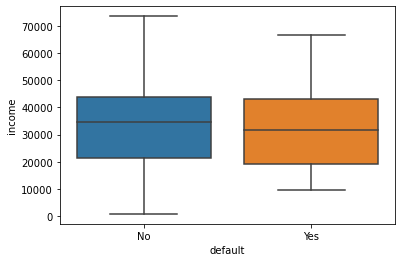

In [23]:
c=sns.boxplot(x ='default', y='income',data=data)

In [24]:
X=data.iloc[:, 3].values.reshape(-1,1)
Y=data.iloc[:,0].values.reshape(-1,1)

### Encoding the feature

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
LB=LabelEncoder()

In [27]:
Y=LB.fit_transform(Y)
Y

C:\Users\wasim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

### splitting the data in Train data and Split Data

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
x_train,x_test,y_train,y_test=tts(X ,Y , test_size=0.2)

### Fitting data in LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR_2=LogisticRegression()

In [32]:
LR_2.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred1=LR_2.predict(x_test)

### confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix

In [35]:
cm=confusion_matrix(y_test,y_pred1)

In [36]:
cm

array([[1928,    0],
       [  72,    0]], dtype=int64)

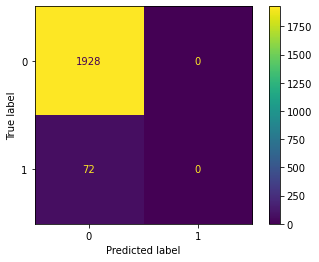

In [37]:
plot_confusion_matrix(LR_2,x_test,y_test)

### Logestic Regression of Income , balance vs Default

In [38]:
X=data.iloc[:,[1,2,3]].values
Y=data.iloc[:,0].values

### Encoding the feature

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
LB_2=LabelEncoder()

In [41]:
X[:,0]=LB_2.fit_transform(X[:,0])
Y=LB_2.fit_transform(Y)

### splitting the data in Train data and Split Data

In [42]:
from sklearn.model_selection import train_test_split as tts

In [43]:
x_train,x_test,y_train,y_test=tts(X,Y, test_size=0.2)

### Fitting data in LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
LR_3=LogisticRegression()

In [46]:
LR_3.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred3=LR_3.predict(x_test)

### confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix

In [49]:
cm=confusion_matrix(y_test,y_pred)

In [50]:
cm

array([[1878,   51],
       [  70,    1]], dtype=int64)

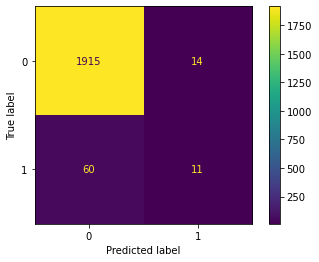

In [51]:
plot_confusion_matrix(LR_3,x_test,y_test)

In [52]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [53]:
z=LR_3.predict(np.c_[xx.ravel(),yy.ravel()])

ValueError: X has 2 features per sample; expecting 3